In [1]:
# import libraries with conventional aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 4.1: Predicting Election Outcomes {-}

### Section 4.1.1: Loops in Python {-}

In [2]:
values = np.array([2, 4, 6])
n = len(values) # number of elements in values
results = np.zeros(n) # empty container vector for storing the results 

# looper counter `i` will take on values 0, 1, ..., n in that order
for i in range(n):
    # store multiplication results as the ith element of `results` vector
    results[i] = values[i] * 2
    print(f"{values[i]} times 2 is equal to {results[i]}")

results

2 times 2 is equal to 4.0
4 times 2 is equal to 8.0
6 times 2 is equal to 12.0


array([ 4.,  8., 12.])

In [3]:
# check if the code runs when i = 0 
# i = 0 represents the first element in 'values' with zero-based indexing
i = 0
x = values[i] * 2
print(f"{values[i]} times 2 is equal to {x}")

2 times 2 is equal to 4


### Section 4.1.2: General Conditional Statements in Python {-}

In [4]:
# define the operation to be executed
operation = 'add'

if operation=='add':
    print('I will perform addition 4 + 4')
    print(4 + 4)

if operation=='multiply':
    print('I will perform multiplication 4 * 4')
    print(4 * 4)

I will perform addition 4 + 4
8


In [5]:
# Note that 'operation' is redefined
operation = 'multiply'

if operation=='add':
    print('I will perform addition 4 + 4')
    print(4 + 4)
else:
    print('I will perform multiplication 4 * 4')
    print(4 * 4)

I will perform multiplication 4 * 4
16


In [6]:
# Note that 'operation' is redefined
operation = 'subtract'

if operation=='add':
    print('I will perform addition 4 + 4')
    print(4 + 4)
elif operation=='multiply':
    print('I will perform multiplication 4 * 4')
    print(4 * 4)
else:
    print(f"'{operation}' is invalid. Use either 'add' or 'multiply'.")

'subtract' is invalid. Use either 'add' or 'multiply'.


In [7]:
values = np.arange(1,6)
n = len(values)
results = np.zeros(n)

for i in range(n):
    # x and r get overwritten in each iteration
    x = values[i]
    r = x % 2 # remainder of x divided by 2 to check if x is even or odd
    if r==0: # remainder is 0
        print(f"{x} is even and I will perform addition {x} + {x}")
        results[i] = x + x
    else: # remainder is not 0
        print(f"{x} is odd and I will perform multiplication {x} * {x}")
        results[i] = x * x

results

1 is odd and I will perform multiplication 1 * 1
2 is even and I will perform addition 2 + 2
3 is odd and I will perform multiplication 3 * 3
4 is even and I will perform addition 4 + 4
5 is odd and I will perform multiplication 5 * 5


array([ 1.,  4.,  9.,  8., 25.])

### Section 4.1.3: Poll Predictions {-}

In [8]:
# import the datetime module
from datetime import datetime

# load election results, by state
pres08 = pd.read_csv('pres08.csv')

# load polling data
polls08 = pd.read_csv('polls08.csv')

# compute Obama's margin
polls08['margin'] = polls08['Obama'] - polls08['McCain']
pres08['margin'] = pres08['Obama'] - pres08['McCain']

x = datetime.strptime('2008-11-04', '%Y-%m-%d')
y = datetime.strptime('2008/9/1', '%Y/%m/%d')

# number of days between 9/1/2008 and 11/4/2008
x-y # a timedelta object

datetime.timedelta(days=64)

In [9]:
# number of days as an integer
(x-y).days 

64

In [10]:
# convert middate to datetime object using pandas convenience function
polls08['middate'] = pd.to_datetime(polls08['middate'])

# compute the number of days to the election; use x defined above
# extract days using the .dt accessor
polls08['days_to_election'] = (x - polls08['middate']).dt.days

# extract unique state names which the loop will iterate through
st_names = polls08['state'].unique()

# initialize a container vector for storing the results as a series
poll_pred = pd.Series(index=st_names)

poll_pred.head()

AL   NaN
AK   NaN
AZ   NaN
AR   NaN
CA   NaN
dtype: float64

In [11]:
# loop across the 50 states plus DC
for i in range(len(st_names)):
    # subset the ith state
    state_data = polls08[polls08['state']==st_names[i]]
    # further subset the latest polls within the state
    latest = (state_data[state_data['days_to_election']==
                         state_data['days_to_election'].min()])
    # compute the mean of the latest polls and store it
    poll_pred[i] = latest['margin'].mean()

poll_pred.head(10)

AL   -25.0
AK   -19.0
AZ    -2.5
AR    -7.0
CA    24.0
CO     7.0
CT    25.0
DC    69.0
DE    30.0
FL     2.0
dtype: float64

Becuase we stored state names as the index, we could use state names as the loop counter. In complex numeric indexing cases, looping through names can be a good alternative. 

In [12]:
poll_pred_alt = pd.Series(index=st_names)

# loop across the 50 states plus DC
for state in st_names:
    # subset the polls data for the current state
    state_data = polls08[polls08['state']==state]
    # subset the latest poll for the current state
    latest = (state_data[state_data['days_to_election']==
                         state_data['days_to_election'].min()])
    # compute the mean of the latest poll and store it in the results vector
    poll_pred_alt[state] = latest['margin'].mean()

# check that results are the same
poll_pred.equals(poll_pred_alt)

True

Recall from chapter 3 that if we want to perform element-wise arithmetic on two equal length vectors whose elements are sorted correctly, the indexes should be identical. Since the `poll_pred` index is state abbreviations, we can reset the `pres08` index to state abbreviations and then extract the margin column without modifying the data frame in place. Of course, we could also add `poll_pred` to the data frame, which we will illustrate later. 

In [13]:
# errors of latest polls
errors = pres08.set_index('state')['margin'] - poll_pred

errors.head()

state
AL     4.0
AK    -2.0
AZ    -6.5
AR   -13.0
CA     0.0
dtype: float64

In [14]:
# mean prediction error
errors.mean()

1.0620915032679739

In [15]:
# root mean squared prediction error
np.sqrt((errors**2).mean())

5.908940458495747

Text(-8.5, 0.075, 'average error')

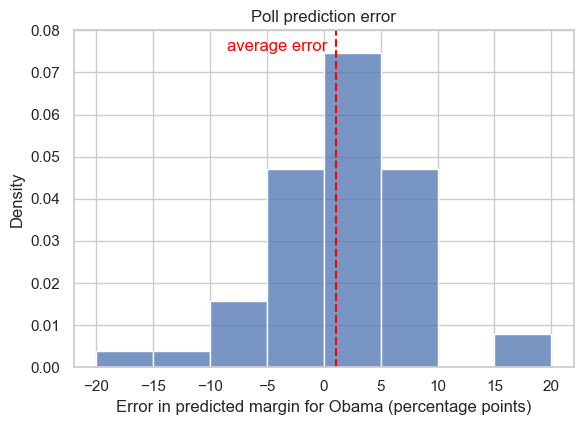

In [16]:
# histogram of errors
sns.set_theme(style="whitegrid")

sns.displot(
    x=errors, stat='density', binrange=(-20, 20), binwidth=5, 
    height=4, aspect=1.5, 
).set(xlabel='Error in predicted margin for Obama (percentage points)', 
      title='Poll prediction error',
      ylim=(0, 0.08)).despine(right=False, top=False)

# add a vertical line representing the mean
plt.axvline(x=errors.mean(), color='red', linestyle='--')

# add a text label for the median
plt.text(x=-8.5, y=0.075, s='average error', color='red')

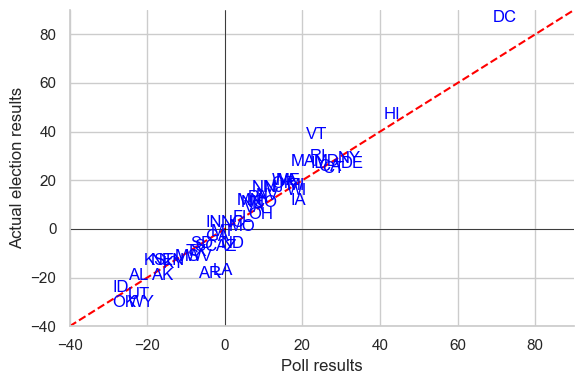

In [17]:
# add poll_pred to pres08 for easier plotting and analysis 
# reset the index to match the index of pres08 and drop the old index
pres08['poll_pred'] = poll_pred.reset_index(drop=True)

# marker='' generates an "empty" plot
sns.relplot(
    data=pres08, x='poll_pred', y='margin', marker='',
    height=4, aspect=1.5,
).set(xlabel='Poll results', ylabel='Actual election results',
      ylim=(-40, 90), xlim=(-40, 90))

# add state abbreviations
for i in range(len(pres08['state'])):
    plt.text(x=pres08['poll_pred'][i], y=pres08['margin'][i], 
             s=pres08['state'][i], color='blue')
    
# add 45 degree line
plt.gca().axline((0, 0), slope=1, color='red', linestyle='--')

# add vertical and horizontal lines at 0
plt.axvline(x=0, color='black', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)

In [18]:
# which state polls called the election wrong?
pres08['state'][np.sign(pres08['poll_pred']) != np.sign(pres08['margin'])]

14    IN
25    MO
33    NC
Name: state, dtype: object

In [19]:
# what was the actual margin for these states?
pres08['margin'][np.sign(pres08['poll_pred']) != np.sign(pres08['margin'])]

14    1
25   -1
33    1
Name: margin, dtype: int64

In [20]:
# actual results: total number of electoral votes won by Obama
pres08['EV'][pres08['margin']>0].sum()

364

In [21]:
# poll prediction
pres08['EV'][pres08['poll_pred']>0].sum()

349

In [22]:
# load the data
pollsUS08 = pd.read_csv('pollsUS08.csv')

# compute number of days to the election as before 
pollsUS08['middate'] = pd.to_datetime(pollsUS08['middate'])

pollsUS08['days_to_election'] = (x - pollsUS08['middate']).dt.days

# empty numpy vectors to store predictions for Obama and McCain
Obama_pred = np.zeros(90)
McCain_pred = np.zeros(90)

With zero-based indexing, the days sequence 1-90 does not match the vector index 0-89. We need to account for this somewhere. One option, among many, is to add 1 to the loop counter when working with the days sequence.

In [23]:
for i in range(len(Obama_pred)):
    # take all polls conducted within the past 7 days
    week_data = (pollsUS08[(pollsUS08['days_to_election'] <= (90 - (i + 1) + 7)) 
                           & (pollsUS08['days_to_election'] > (90 - (i + 1)))]) 
    # compute the mean of the polls for Obama and McCain
    Obama_pred[i] = week_data['Obama'].mean()
    McCain_pred[i] = week_data['McCain'].mean()

# put together a data frame for plotting
pollsUS08_avg = pd.DataFrame({'Obama': Obama_pred, 
                              'McCain': McCain_pred,
                              'days_to_election': np.arange(90, 0, -1)})

pollsUS08_avg.head()

,Obama,McCain,days_to_election
0,44.538462,40.692308,90
1,45.000000,40.692308,89
2,45.230769,40.846154,88
3,45.750000,42.000000,87
4,45.888889,42.000000,86


Recall from chapter three that plotting groups in seaborn works best when the grouping variable is stored in a single column. In this case, the grouping variable is the candidate. To pivot the candidates into a single column, we need to reshape the data into a longer format, which we can do with the `melt()` method in pandas. 

In [24]:
# reshape the data: pivot longer using melt
pollsUS08_avg_long = pollsUS08_avg.melt(id_vars='days_to_election', 
                                        var_name='Candidate', 
                                        value_name='poll_avg')

pollsUS08_avg_long.head()

,days_to_election,Candidate,poll_avg
0,90,Obama,44.538462
1,89,Obama,45.000000
2,88,Obama,45.230769
3,87,Obama,45.750000
4,86,Obama,45.888889


In [25]:
pollsUS08_avg_long.tail()

,days_to_election,Candidate,poll_avg
175,5,McCain,43.384615
176,4,McCain,43.708333
177,3,McCain,44.000000
178,2,McCain,44.185185
179,1,McCain,44.160000


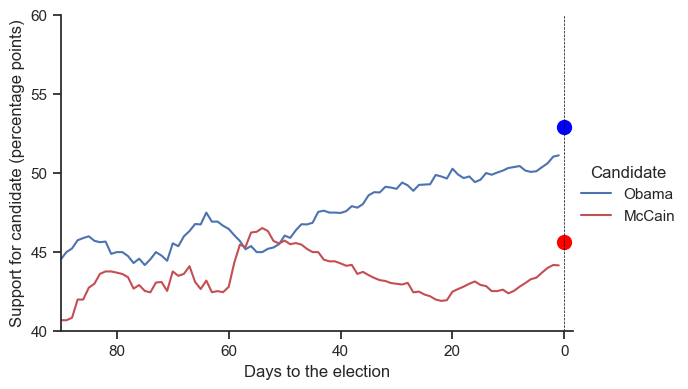

In [26]:
sns.set_theme(style="ticks")

# plot going from 90 days to 1 day before the election
sns.relplot(
    data=pollsUS08_avg_long, x='days_to_election', y='poll_avg', 
    hue='Candidate', kind='line', 
    palette=['b', 'r'], height=4, aspect=1.5
).set(ylim=(40, 60), yticks=range(40, 61, 5), 
      xlim=(90, -1.5), # small buffer in right limit for aesthetics
      xlabel='Days to the election', 
      ylabel='Support for candidate (percentage points)')

# line indicating election day
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

# actual election results 
plt.scatter(0, 52.93, color='blue', s=100)
plt.scatter(0, 45.65, color='red', s=100)

## Section 4.2: Linear Regression {-}

### Section 4.2.1: Facial Appearance and Election Outcomes {-}

**In progress**